In [ ]:
!pip install rpy2

In [5]:
%load_ext rpy2.ipython


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
%cd /content/drive/My Drive/NSTIP/

/content/drive/My Drive/NSTIP


In [ ]:
%%R

install.packages("tidyverse")
install.packages("dplyr")
install.packages("readr")
install.packages("visdat")
install.packages("ggplot2")
install.packages("scales")
install.packages("viridis")
 # For percent_format()

library(tidyverse)
library(dplyr)
library(readr)
library(visdat)
library(scales)
library(viridis)

In [ ]:
%%R
allgradsdata <- read_csv("/content/drive/My Drive/NSTIP/AllGraduatesData2022.csv")
stemgrads <- read_csv("/content/drive/My Drive/NSTIP/STEMgraduates.csv")
head(allgradsdata)

In [ ]:
%%R
head(stemgrads)

names(stemgrads) <- tolower(names(stemgrads))

print(names(stemgrads))

In [ ]:
%%R
# Print the unique categories for the level
print(unique(stemgrads$level))


In [153]:
%%R
#Clean the level variable

stemgrads <- stemgrads %>%
  mutate(level = case_when(
    level == "Degree" ~ "Bachelors",
    level == "Degree Level" ~ "Bachelors",
    level == "Undergraduate" ~ "Bachelors",
    level == "BACHELOR'S" ~ "Bachelors",
    level == "DEGREE" ~ "Bachelors",
    level == "Bachelor's degree" ~ "Bachelors",
    level == "Bacherors" ~ "Bachelors",
    level == "Bacheror" ~ "Bachelors",
    level == "Bacheros" ~ "Bachelors",
    level == "Masters Level" ~ "Masters",
    level == "MASTERS DEGREE" ~ "Masters",
    level == "UNDERGRADUATE" ~ "Bachelors",
    level == "MASTER'S" ~ "Masters",
    level == "Diploma Level" ~ "Diploma",
    level == "Foundetion Diploma" ~ "Diploma",
    level == "Diploma Level 5" ~ "Diploma",
    level == "NCC LEVEL 5 DIPLOMA" ~ "Diploma",
    level == "NCC LEVEL 4 DIPLOMA" ~ "Diploma",
    level == "diploma" ~ "Diploma",
    level == "DIPLOMA" ~ "Diploma",
    level == "Level 4" ~ "Diploma",
    level == "Dipoma" ~ "Diploma",
    level == "Level 6" ~ "Bachelors",
    level == "Chichewa Program" ~ "Certificate",
    level == "English Program" ~ "Certificate",
    level == "CERTIFICATE" ~ "Certificate",
    level == "PhD" ~ "Doctorate",
    level == "Doctors" ~ "Doctorate",
    level == "7" ~ "Bachelors",
    level == "9" ~ "Masters",
    level == "10" ~ "Doctorate",
    level == "PHD" ~ "Doctorate",
    level == "4" ~ "Certificate",
    level == "certificate" ~ "Certificate",
    level == "5" ~ "Diploma",
    level == "6" ~ "Diploma",
     level == "Diplomas" ~ "Diploma",
    level == "Post Graduate" ~ "Masters",
    level == "Postgraduate" ~ "Masters",
    level == "CA Level 1" ~ "Diploma",
    level == "Postgraduate Diploma Level" ~ "Postgraduate Other",
    TRUE ~ as.character(level)
  ))


In [ ]:
%%R
print(unique(stemgrads$level)) # Check the categories for the level have been correctly replaced

In [ ]:
%%R
#Renaming some variables
stemgrads <- stemgrads%>%
  rename(
    program_type = `prog_indicator...3`)

print(names(stemgrads))

Creating an indicator variable for institution type.
1= public institution
0= private institution

In [155]:
%%R

stemgrads <- stemgrads %>%
  mutate(
    institution_type = case_when(
      !is.na(public) ~ 1,
      !is.na(private) ~ 0,
      TRUE ~ NA_integer_
    )
  )

stemgrads <- stemgrads %>%
  mutate(row_id = row_number()) %>%
  pivot_longer(cols = c(private, public), names_to = "type_institution", values_to = "institution_value") %>%
  filter(!is.na(institution_value)) %>%
  mutate(institution_type = ifelse(institution_type == "public", 1, 0)) %>%
  select(-row_id)

# **consolidate programs**

In [156]:
%%R
stemgrads <- stemgrads %>%
  mutate(all_programs = coalesce(stem, sti, ict, `miscellaneous programs`))

#print(stemgrads$all_programs)

In [ ]:
%%R
install.packages("stringr")
library(stringr)

In [157]:
%%R
stemgrads <- stemgrads %>%
  mutate(all_programs = tolower(all_programs))

In [158]:
%%R
stemgrads <- stemgrads%>%
    mutate(program_type= case_when(
        program_type ==1 ~ "STEM",
        program_type ==2 ~ "ICT",
        program_type ==3 ~ "STI",
        program_type ==4 ~ "Humanities, Arts and Social Sciences",
    ))

  #Rename institutions properly
 stemgrads <- stemgrads%>%
    mutate("institution_value"= case_when(
        institution_value =="DOMASI College of EDU" ~ "Domasi College of Education",
        institution_value =="Malawi College of health Sciences" ~ "Malawi College of Health Sciences",
        institution_value =="MIM" ~ "Malawi Institute of Management",
        institution_value =="NACT BT College" ~ "NACIT",
        institution_value =="NACT LLZ College" ~ "NACIT",
        institution_value =="NALIKULE College of EDU" ~ "Nalikule College of Education",
    ))

In [ ]:
%%R

stemgrads <- stemgrads %>%
  mutate(main_course = case_when(
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "mathematics|mathematical") ~ "Mathematics",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "engineering") ~ "Engineering",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "statistics") ~ "Statistics",
     program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "education|edu") ~ "Education sciences",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "information systems|computer|computing|information|technology|ict|innovation|geoinformatics|technologies") ~ "Information Systems",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "agriculture|agro|seed|culture|agricultural|aquaculture|fisheries|extension") ~ "Agricultural Sciences",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "biomedical|health|surgery|medicine|pharmacy|epidemiology|antimicrobial|radiography|opthalmology|dental|optometry|anaesthesia|orthopaedics|gynaecology|otorhinolaryngology|laboratory|physiotherapy|palliative") ~ "Health Sciences",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "physics|water|nutrition|soil|animal|forestry|crop|earth|geology|food|ecology|che|chemistry|climate|environmental") ~ "Natural Sciences",
    program_type %in% c("ICT", "STEM", "STI") & str_detect(all_programs, "bio|parasitology|nutrition|veterinary|`education (science)`") ~ "Life Sciences",
    TRUE ~ NA_character_
  ))

print(unique(stemgrads$main_course))

In [166]:
%%R
stemgradsna <- stemgrads %>%
  filter(is.na(main_course) & program_type %in% c("ICT", "STEM", "STI"))

print(unique(stemgradsna$all_programs))

[1] "diploma in land administration" "c"                             


In [ ]:
%%R
#check categorization
filtered_programs <- stemgrads %>%
  filter(str_detect(main_course, "Natural Sciences"))

print(filtered_programs[, c("all_programs", "main_course")])


In [171]:
%%R
#stemgrads <- stemgrads[order(stemgrads$institution_value), ]
#write.csv(stemgrads, "stemgradsdata.csv", row.names = TRUE)

filtered_programs <- filtered_programs[order(filtered_programs$main_course), ]
write.csv(filtered_programs, "maincoursedata.csv", row.names = TRUE)


# **Check missingness**

In [96]:
%%R
stemgradsdata <- stemgrads[c("program_type","males", "females","level", "type_institution",
                         "institution_value")]

In [ ]:
%%R
missingness<- sapply(stemgradsdata, function(x) sum(is.na(x)))
print(missingness)


In [ ]:
%%R
rows_with_na <- apply(is.na(stemgradsdata), 1, any)

observations_with_missing <- stemgradsdata[rows_with_na, ]

print(observations_with_missing)

# Convert to data frame
missing_values <- as.data.frame(t(missingness))
names(missing_values) <- c("Missing_Values")

In [ ]:
%%R
#check for outliers, assume any numbers greater 300 need to be checked
outliers_males <- sum(stemgradsdata$males > 300, na.rm = TRUE)
outliers_females <- sum(stemgradsdata$females > 300, na.rm = TRUE)

# Combine into a data frame
outliers_summary <- data.frame(Variable = c("males", "females"),
                               Outliers = c(outliers_males, outliers_females))

print(outliers_summary)
# Filter rows that have any missing value
rows_with_na <- apply(is.na(stemgradsdata), 1, any)
observations_with_missing <- stemgradsdata[rows_with_na, ]

# save CSV file
write.csv(observations_with_missing, "missing.csv", row.names = FALSE)

outliers <- stemgradsdata[(stemgradsdata$males > 300 & !is.na(stemgradsdata$males)) |
                          (stemgradsdata$females > 300 & !is.na(stemgradsdata$females)), ]


write.csv(outliers, "outliers.csv", row.names = FALSE)

# **Drop all rows missing numbers on males and females or any outliers** (To be reviewed)

In [119]:
%%R
cleanedgrads_data <- stemgradsdata[!((is.na(stemgradsdata$males) | stemgradsdata$males > 300) |
                                 (is.na(stemgradsdata$females) | stemgradsdata$females > 300)), ]
# save clean data CSV file
write.csv(cleanedgrads_data, "cleangrads_data.csv", row.names = FALSE)

# **Totals of all grads in 2022**

In [9]:
%%R

cleanedgrads_data <- read_csv("/content/drive/My Drive/NSTIP/cleangrads_data.csv")

total2022<- cleanedgrads_data %>%
  summarise(Total_Females = sum(females, na.rm = TRUE),
            Total_Males = sum(males, na.rm = TRUE))
print(total2022)

Rows: 530 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): program_type, level, type_institution, institution_value
dbl (2): males, females

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 1 × 2
  Total_Females Total_Males
          <dbl>       <dbl>
1          7201        9534


Number of females and males by program type

In [134]:
%%R
totalbyprogram <- cleanedgrads_data %>%
    group_by(program_type) %>%
    summarise(
      total_females = sum(females),
      total_males = sum(males),
      total_combined = sum(females, na.rm = TRUE) + sum(males, na.rm = TRUE)
  )
print(totalbyprogram)

overall_total <- sum(cleanedgrads_data$females, na.rm = TRUE) + sum(cleanedgrads_data$males, na.rm = TRUE)

totalbyprogram <- cleanedgrads_data %>%
  group_by(program_type) %>%
  summarise(
    total_fem = sum(females, na.rm = TRUE),
    total_mal = sum(males, na.rm = TRUE),
    total_combined = sum(females, na.rm = TRUE) + sum(males, na.rm = TRUE)
  ) %>%
  mutate(
    percent_fem = (total_fem / total_combined) * 100,
    percent_mal = (total_mal / total_combined) * 100,
    percent_of_total = (total_combined / overall_total) * 100  # Calculate the percentage of each program type over the total
  )

print(totalbyprogram)


# A tibble: 4 × 4
  program_type                         total_females total_males total_combined
  <chr>                                        <dbl>       <dbl>          <dbl>
1 Humanities, Arts and Social Sciences          4818        4988           9806
2 ICT                                            439        1032           1471
3 STEM                                          1834        3203           5037
4 STI                                            110         311            421
# A tibble: 4 × 7
  program_type        total_fem total_mal total_combined percent_fem percent_mal
  <chr>                   <dbl>     <dbl>          <dbl>       <dbl>       <dbl>
1 Humanities, Arts a…      4818      4988           9806        49.1        50.9
2 ICT                       439      1032           1471        29.8        70.2
3 STEM                     1834      3203           5037        36.4        63.6
4 STI                       110       311            421        26.1        73.

Numbers of males and females by degree level

In [121]:
%%R
cleanedgrads_data %>%
  group_by(level) %>%
  summarise(
    total_males = sum(males, na.rm = TRUE),
    total_females = sum(females, na.rm = TRUE)
  ) %>%
  print()

# A tibble: 6 × 3
  level              total_males total_females
  <chr>                    <dbl>         <dbl>
1 Bachelors                 6486          4990
2 Certificate                171           151
3 Diploma                   2476          1820
4 Doctorate                   13             6
5 Masters                    372           226
6 Postgraduate Other          16             8


**Gender comparisons by program type**

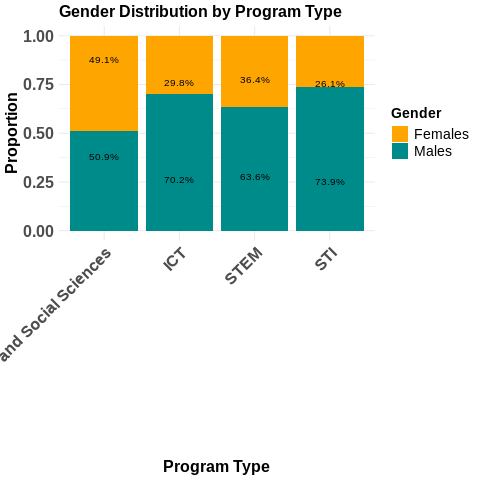

In [16]:
%%R
library(ggplot2)

#aggregate gender data
gender_distribution <- cleanedgrads_data %>%
  group_by(program_type) %>%
  summarise(
    total_fem = sum(females, na.rm = TRUE),
    total_mal = sum(males, na.rm = TRUE)
  ) %>%
  mutate(total_combined = total_fem + total_mal) %>%
  pivot_longer(cols = c(total_fem, total_mal), names_to = "gender", values_to = "count") %>%
  mutate(
    gender = recode(gender, "total_fem" = "Females", "total_mal" = "Males"),
    percentage = count / total_combined * 100
  ) %>%
  select(-total_combined)

# # Plotting
# ggplot(gender_distribution, aes(x = program_type, y = count, fill = gender)) +
#   geom_bar(stat = "identity", position = "fill") +
#    geom_text(aes(label = scales::percent(..prop.., accuracy = 0.1),
#                 y = ..prop.. * ..count..),
#             stat = "count", position = position_fill(vjust = 0.5),
#             size = 3.5, color = "black") +
#   scale_fill_manual(values = c("Females" = "Orange", "Males" = "darkcyan")) +
#   labs(title = "Gender Distribution by Program Type",
#        x = "Program Type",
#        y = "Proportion",
#        fill = "Gender") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1),
#     strip.text = element_text(face="bold", size=16),
#     axis.title = element_text(size=16, face="bold"),
#     axis.text = element_text(size=16, face="bold"),
#     legend.title = element_text(size=14, face="bold"),
#     legend.text = element_text(size=14)
#   )

# Plotting
ggplot(gender_distribution, aes(x = program_type, y = count, fill = gender)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(sprintf("%.1f%%", percentage)),
                y = cumsum(count) - 0.5 * count),
            position = position_fill(vjust = 0.5),
            size = 3.5, color = "black") +
  scale_fill_manual(values = c("Females" = "Orange", "Males" = "darkcyan")) +
  labs(title = "Gender Distribution by Program Type",
       x = "Program Type",
       y = "Proportion",
       fill = "Gender") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(face="bold", size=16),
        axis.title = element_text(size=16, face="bold"),
        axis.text = element_text(size=16, face="bold"),
        plot.title = element_text(size=16, face="bold"),
        legend.title = element_text(size=14, face="bold"),
        legend.text = element_text(size=14))


**Gender comparisons by level**

[1] "Certificate"        "Diploma"            "Bachelors"         
[4] "Masters"            "Doctorate"          "Postgraduate Other"


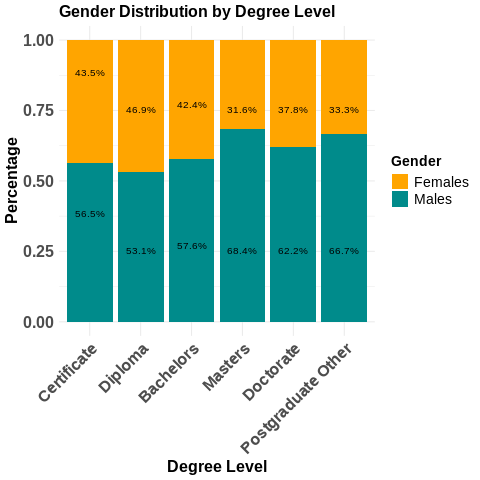

In [20]:
%%R
library(ggplot2)

#aggregate gender data
gender_distribution <- cleanedgrads_data %>%
  group_by(level) %>%
  summarise(
    total_fem = sum(females, na.rm = TRUE),
    total_mal = sum(males, na.rm = TRUE)
  ) %>%
  mutate(total_combined = total_fem + total_mal) %>%
  pivot_longer(cols = c(total_fem, total_mal), names_to = "gender", values_to = "count") %>%
  mutate(
    gender = recode(gender, "total_fem" = "Females", "total_mal" = "Males"),
    percentage = count / total_combined * 100
  ) %>%
  select(-total_combined)

  # Convert facility_id to a factor if it's not already
gender_distribution$level <- factor(gender_distribution$level)

levels(gender_distribution$level) <- c("Certificate", "Diploma",
                                        "Bachelors", "Masters", "Doctorate", "Postgraduate Other")

# Check to ensure the levels are correctly updated
print(levels(gender_distribution$level))

# Plotting
ggplot(gender_distribution, aes(x = level, y = count, fill = gender)) +
  geom_bar(stat = "identity", position = "fill") +
  geom_text(aes(label = paste0(sprintf("%.1f%%", percentage)),
                y = cumsum(count) - 0.5 * count),
            position = position_fill(vjust = 0.5),
            size = 3.5, color = "black") +
  scale_fill_manual(values = c("Females" = "Orange", "Males" = "darkcyan")) +
  labs(title = "Gender Distribution by Degree Level",
       x = "Degree Level",
       y = "Percentage",
       fill = "Gender") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text = element_text(face="bold", size=16),
        axis.title = element_text(size=16, face="bold"),
        axis.text = element_text(size=16, face="bold"),
        plot.title = element_text(size=16, face="bold"),
        legend.title = element_text(size=14, face="bold"),
        legend.text = element_text(size=14))



In [ ]:
%%R

gender_distribution_inst <- cleanedgrads_data %>%
  group_by(program_type, type_institution) %>%
  summarise(
    total_fem = sum(females, na.rm = TRUE),
    total_mal = sum(males, na.rm = TRUE)
  ) %>%
  mutate(total_combined = total_fem + total_mal) %>%
  pivot_longer(cols = c(total_fem, total_mal), names_to = "gender", values_to = "count") %>%
  mutate(
    gender = recode(gender, "total_fem" = "Females", "total_mal" = "Males"),
    percentage = count / total_combined * 100
  ) %>%
  select(-total_combined)


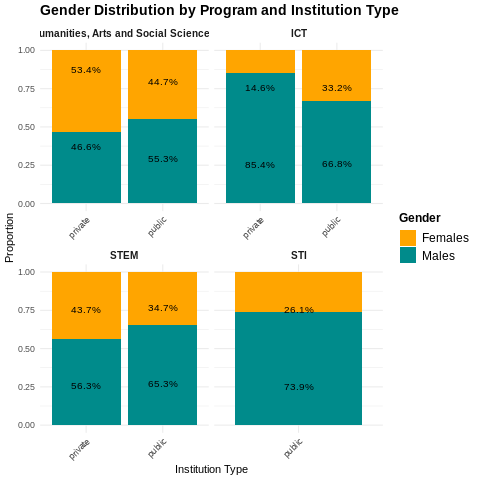

In [27]:
%%R
ggplot(gender_distribution_inst, aes(x = type_institution, y = count, fill = gender)) +
  geom_bar(stat = "identity", position = "fill") +
  facet_wrap(~program_type, scales = "free_x", ncol = 2) +
    geom_text(aes(label = paste0(sprintf("%.1f%%", percentage)),
                y = cumsum(count) - 0.5 * count),
            position = position_fill(vjust = 0.5),
            size = 3.5, color = "black") +
  scale_fill_manual(values = c("Females" = "Orange", "Males" = "darkcyan")) +
  labs(title = "Gender Distribution by Program and Institution Type",
       x = "Institution Type",
       y = "Proportion",
       fill = "Gender") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text.x = element_text(size = 10, face = "bold"),
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12))


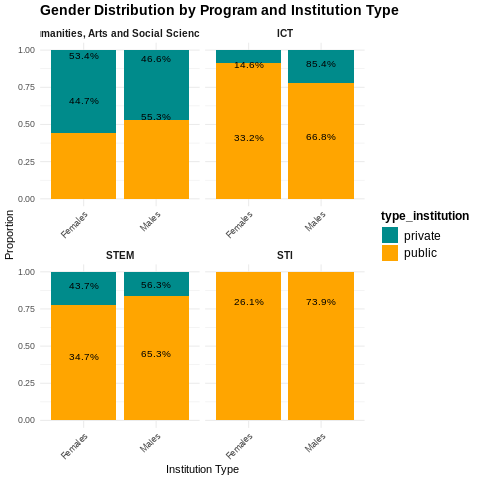

In [32]:
%%R
ggplot(gender_distribution_inst, aes(x = gender, y = count, fill = type_institution)) +
  geom_bar(stat = "identity", position = "fill") +
  facet_wrap(~program_type, scales = "free_x", ncol = 2) +
    geom_text(aes(label = paste0(sprintf("%.1f%%", percentage)),
                y = cumsum(count) - 0.5 * count),
            position = position_fill(vjust = 0.8),
            size = 3.5, color = "black") +
  scale_fill_manual(values = c("public" = "Orange", "private" = "darkcyan")) +
  labs(title = "Gender Distribution by Program and Institution Type",
       x = "Institution Type",
       y = "Proportion",
       fill = "type_institution") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        strip.text.x = element_text(size = 10, face = "bold"),
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 12, face = "bold"),
        legend.text = element_text(size = 12))


In [ ]:
# %%R

# ggplot(gender_distribution_inst, aes(x = program_type, y = count, fill = gender)) +
#   geom_bar(stat = "identity", position = position_dodge(width = 0.7), width = 0.6) +
#   facet_wrap(~type_institution, scales = "free_x", nrow = 1) +
#   scale_fill_manual(values = c("Females" = "#FFA07A", "Males" = "#20B2AA")) +
#   labs(title = "Gender Distribution by Program Type and Institution Type",
#        x = "Program Type",
#        y = "Count",
#        fill = "Gender") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
#         strip.text.x = element_text(size = 10, face = "bold"),
#         plot.title = element_text(size = 14, face = "bold"),
#         legend.title = element_text(size = 12, face = "bold"),
#         legend.text = element_text(size = 12),
#         axis.title = element_text(size = 12, face = "bold"))


# **Institution with the most graduates for both "STEM" and "STI" program types**

In [34]:
%%R

total_graduates <- cleanedgrads_data %>%
  group_by(institution_value, program_type) %>%
  summarise(total_graduates = sum(females, na.rm = TRUE) + sum(males, na.rm = TRUE))

# Filtering for STEM, STI Aand ICT program types only
filtered_graduates <- total_graduates %>%
  filter(program_type %in% c("STEM", "STI", "ICT"))


`summarise()` has grouped output by 'institution_value'. You can override using
the `.groups` argument.


In [ ]:
# Identifying the top institution for each program type based on total graduates
%%R
top_institutions <- filtered_graduates %>%
  arrange(desc(total_graduates)) %>%
  group_by(program_type) %>%
  slice(1)

install.packages("viridis")
library(viridis)

# Visualization
p<-ggplot(filtered_graduates, aes(x = institution_value, y = total_graduates, fill = program_type)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Distribution of Program Type by Institution",
       x = "Institution",
       y = "Total Graduates",
       fill = "Program Type") +
       coord_flip() +
       scale_colour_viridis_d() +
       scale_y_continuous(breaks = seq(0, max(filtered_graduates$total_graduates), by = 300)) + # Adjust scale for y (flipped to x)
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.y = element_text(size = 15),
        axis.title.x = element_text(size = 15),
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 14))

# Saving the plot to a specific file with desired dimensions
ggsave("ProgramByInstitution.png", plot = p, width = 10, height = 6, dpi = 300)

In [86]:
# Ordering based on the total graduates for 'STI'
%%R
sti_graduates <- filtered_graduates %>%
  filter(program_type == "STEM")

institution_order <- sti_graduates %>%
  arrange(desc(total_graduates)) %>%
  mutate(institution_value = factor(institution_value, levels = unique(institution_value)))

filtered_graduates_ordered <- filtered_graduates %>%
  mutate(institution_value = factor(institution_value, levels = institution_order$institution_value))

#Replace NA with NACIT
filtered_graduates_ordered  <- filtered_graduates_ordered %>%
  mutate(institution_value = case_when(
    is.na(institution_value) ~ "NACIT",
    TRUE ~ institution_value
  ))


  # plot
s<- ggplot(filtered_graduates_ordered, aes(x = institution_value, y = total_graduates, fill = program_type)) +
  geom_bar(stat = "identity", position = "stack") +
  coord_flip() +
  scale_fill_brewer(palette = "Set1") +
  scale_y_continuous(breaks = seq(0, max(filtered_graduates$total_graduates), by = 300)) +
  labs(title = "Distribution of Program Type by Institution",
       x = "Institution",
       y = "Total Graduates",
       fill = "Program Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.y = element_text(size = 15),
        axis.title.x = element_text(size = 15),
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 14))
  s
  ggsave("ProgramByInstitution2.png", plot = s, width = 10, height = 6, dpi = 300)

In [90]:
%%R
sti_order <- filtered_graduates %>%
  filter(program_type == "STEM") %>%
  group_by(institution_value) %>%
  summarise(total_graduates = sum(total_graduates)) %>%
  arrange(-total_graduates) %>%
  .$institution_value

# Order by institution_value
filtered_graduates <- filtered_graduates %>%
  mutate(institution_value = factor(institution_value, levels = rev(sti_order)))

#Replace NA with NACIT
filtered_graduates  <- filtered_graduates %>%
  mutate(institution_value = case_when(
    is.na(institution_value) ~ "NACIT",
    TRUE ~ institution_value
  ))

# Now, plot with 'institution_value' ordered as desired
b<-ggplot(filtered_graduates, aes(x = institution_value, y = total_graduates, fill = program_type)) +
  geom_bar(stat = "identity", position = "stack") +
  coord_flip() +
  scale_fill_viridis_d() +
  scale_y_continuous(breaks = seq(0, max(filtered_graduates$total_graduates), by = 300)) +
  labs(title = "Distribution of Program Type by Institution",
       x = "Institution",
       y = "Total Graduates",
       fill = "Program Type") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.y = element_text(size = 15),
        axis.title.x = element_text(size = 15),
        plot.title = element_text(size = 14, face = "bold"),
        legend.title = element_text(size = 14, face = "bold"),
        legend.text = element_text(size = 14),
        panel.grid.minor = element_blank(),
        panel.grid.major = element_blank()
  )
  ggsave("ProgramByInstitution3.png", plot = b, width = 10, height = 6, dpi = 300)